## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [214]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [215]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

In [216]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 2)
(3750,)
(1250, 2)
(1250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [217]:
## Your code HERE
N1, N2, sum1, sum2 = 0, 0, 0, 0
for i in range(len(y_train)):
    if y_train[i] == 0: 
        # compute the amount of points in class 1
        N1 += 1
        # compute the sum of each data point in class 1
        sum1 += x_train[i]
    else: 
        # compute the amount of points in class 2
        N2 += 1
        # compute the sum of each data point in class 2
        sum2 += x_train[i]

# compute m1 & m2
m1 = sum1 / N1
m2 = sum2 / N2


In [218]:
print(f"mean vector of class 1: {m1}", f"\nmean vector of class 2: {m2}")

mean vector of class 1: [ 0.99253136 -0.99115481] 
mean vector of class 2: [-0.9888012   1.00522778]


## 2. Compute the Within-class scatter matrix SW

In [219]:
## Your code HERE
# initialize sw
sw = np.array([[0.0, 0.0], [0.0, 0.0]])
# compute sw
for i in range(len(y_train)):
    if y_train[i] == 0:
        tmp = x_train[i] - m1
        sw += np.outer(tmp, tmp)
    else:
        tmp = x_train[i] - m2
        sw += np.outer(tmp, tmp)

In [220]:
print(f"Within-class scatter matrix SW: \n{sw}")

Within-class scatter matrix SW: 
[[ 4337.38546493 -1795.55656547]
 [-1795.55656547  2834.75834886]]


## 3.  Compute the Between-class scatter matrix SB

In [221]:
## Your code HERE
tmp = m2 - m1
# compute sb = (m2 - m1)(m2 - m1)^T
sb = np.outer(tmp, tmp)

In [222]:
print(f"Between-class scatter matrix SB: \n{sb}")

Between-class scatter matrix SB: 
[[ 3.92567873 -3.95549783]
 [-3.95549783  3.98554344]]


## 4. Compute the Fisher’s linear discriminant

In [223]:
## Your code HERE
# by differentiating the Fisher Criterion with respect to w
# we can derive that w is in the same direction as sw^-1(m2 - m1)
sw_inv = np.linalg.inv(sw)
tmp = np.matmul(sw_inv, m2 - m1)
# normalize w to unit length
w = tmp / np.linalg.norm(tmp)

In [224]:
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [-0.37003809  0.92901658]


## 5. Project the test data by linear discriminant and get the class prediction by `K` nearest-neighbor rule. Please report the accuracy score with `K` values from 1 to 5
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [225]:
# function definition : projecting points to a line
def project(x):
    x_project = np.zeros((len(x), 2))
    for i in range(len(x)):
        length = np.dot(x[i], w)
        x_project[i] = w * length
    return x_project

# project x_train & x_test to the line of direction w 
x_train_project = project(x_train)
x_test_project = project(x_test)
y_pred = np.zeros(len(y_test))

# function definition : get the class predition by K nearest-neighbor rule
def predict(K):
    for i in range(len(x_test)):
        # acquire the K nearest points
        distance = abs(x_train_project - x_test_project[i])
        sorted = np.argsort(distance, axis=0)[:K]
        # use the variable cnt to record the number of appearance of class 0
        cnt = 0
        for j in range(K):
            if y_train[sorted[j][0]] == 0: cnt += 1
        if cnt < K - cnt: y_pred[i] = 1
        else: y_pred[i] = 0
    return y_pred

# get the class prediction by giving different values of K
for k in range(5):
    acc = accuracy_score(y_test, predict(k + 1))
    # print out the accuracy
    print(f"Accuracy of K = {k + 1} test-set: {acc}")


Accuracy of K = 1 test-set: 0.8488
Accuracy of K = 2 test-set: 0.8704
Accuracy of K = 3 test-set: 0.8792
Accuracy of K = 4 test-set: 0.8824
Accuracy of K = 5 test-set: 0.8912


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

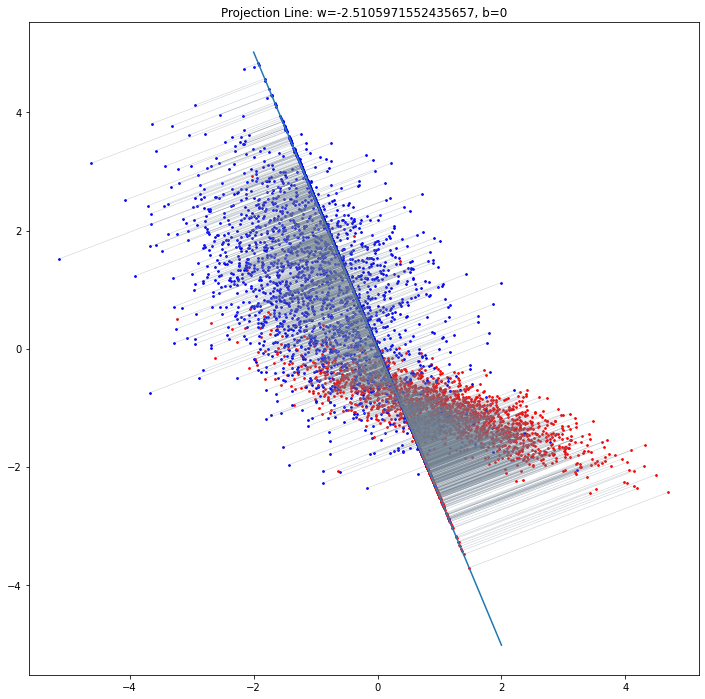

In [226]:
plt.figure(figsize=(12, 12))
plt.title(f"Projection Line: w={w[1] / w[0]}, b=0")

# plot the line
x = np.linspace(-2, 2)
y = (w[1] / w[0]) * x
plt.plot(x, y)

# plot the data points & projection points
x0, x1, y0, y1 = [], [], [], []
for i in range(len(x_train)):
    if y_train[i] == 0: 
        x0.append(x_train[i][0])
        x0.append(x_train_project[i][0])
        y0.append(x_train[i][1])
        y0.append(x_train_project[i][1])
    else: 
        x1.append(x_train[i][0])
        x1.append(x_train_project[i][0])
        y1.append(x_train[i][1])
        y1.append(x_train_project[i][1])

plt.scatter(x0, y0, c='r', s=3)
plt.scatter(x1, y1, c='b', s=3)

# connect the project points with data points
for i in range(len(x_train)):
    xp = [x_train_project[i][0], x_train[i][0]]
    yp = [x_train_project[i][1], x_train[i][1]]
    plt.plot(xp, yp, color='slategrey', alpha=0.4, linewidth=0.5)

plt.show()